In [134]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

dataset = datasets.load_linnerud()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [135]:
print(dataset.keys())

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [136]:
df.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [137]:
df.shape

(20, 3)

In [138]:
df_target = dataset.target
df_target

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

In [139]:
df['label1'] = dataset.target[:,0]
#df['label2'] = dataset.target[:,1]
#df['label3'] = dataset.target[:,2]

In [140]:
df

,Chins,Situps,Jumps,label1
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0
5,4.0,101.0,42.0,182.0
6,8.0,101.0,38.0,211.0
7,6.0,125.0,40.0,167.0
8,15.0,200.0,40.0,176.0
9,17.0,251.0,250.0,154.0


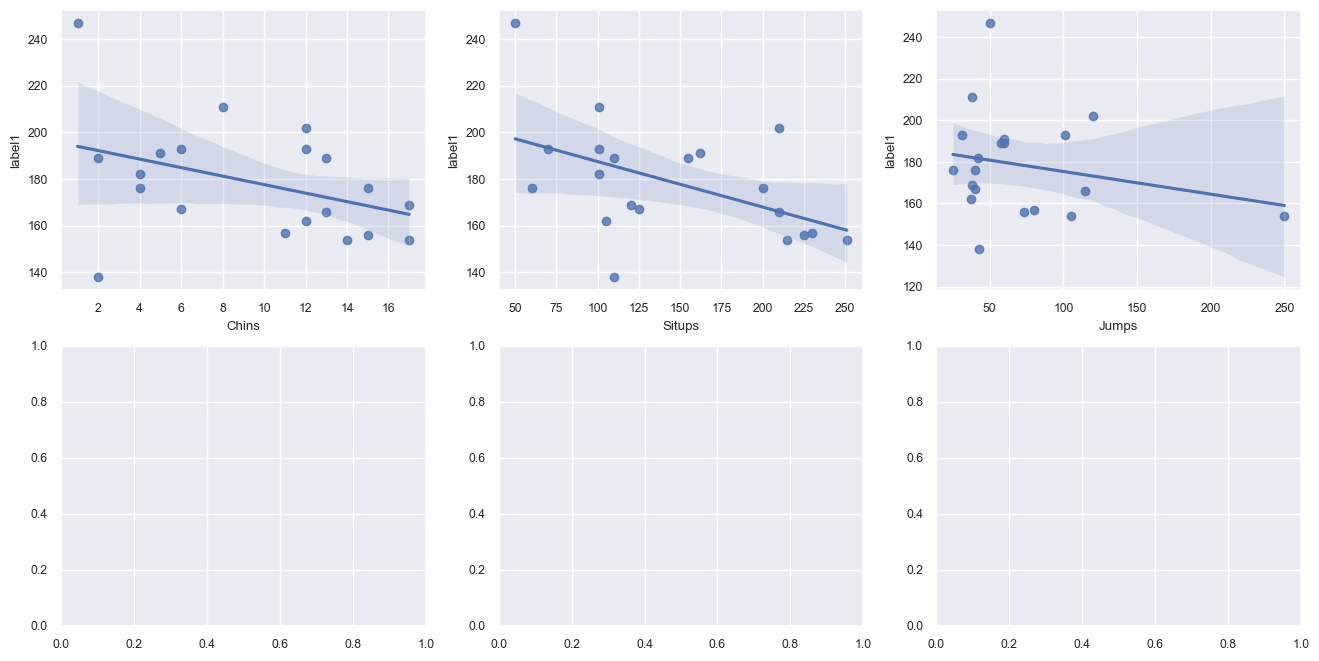

In [141]:
#fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=3)
fig, axs = plt.subplots(figsize=(16, 8), ncols=3, nrows=2)

lm_features = ['Chins', 'Situps', 'Jumps']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    col = i%3

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='label1', data=df, ax=axs[0][col])
    #sns.regplot(x=feature, y='label2', data=df, ax=axs[row+1][col])
    #sns.regplot(x=feature, y='label3', data=df, ax=axs[row+2][col])

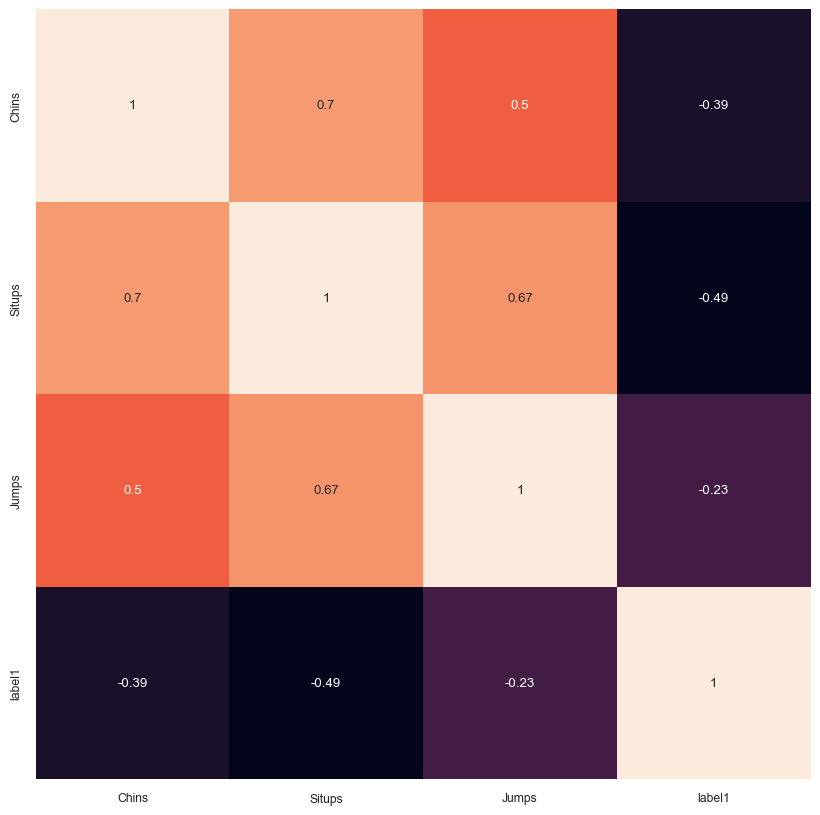

In [142]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['Chins', 'Situps', 'Jumps']]
y_data=df.loc[:, 'label1']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [145]:
X_train.head()

,Chins,Situps,Jumps
14,6.0,70.0,31.0
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0


In [146]:
y_train.head()

14    193.0
16    176.0
10    169.0
8     176.0
5     182.0
Name: label1, dtype: float64

In [147]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [148]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [-1.  -0.1  0.2]
상수항(절편): 200.7


In [149]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(16, 3) (4, 3)


In [150]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 1559.793, RMSE: 39.494
Variance score : 0.115


In [151]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))
print(X_test)

절편 값: 200.65050193110943
회귀계수: [-1.  -0.1  0.2]
    Chins  Situps  Jumps
19    2.0   110.0   43.0
13    1.0    50.0   50.0
9    17.0   251.0  250.0
7     6.0   125.0   40.0


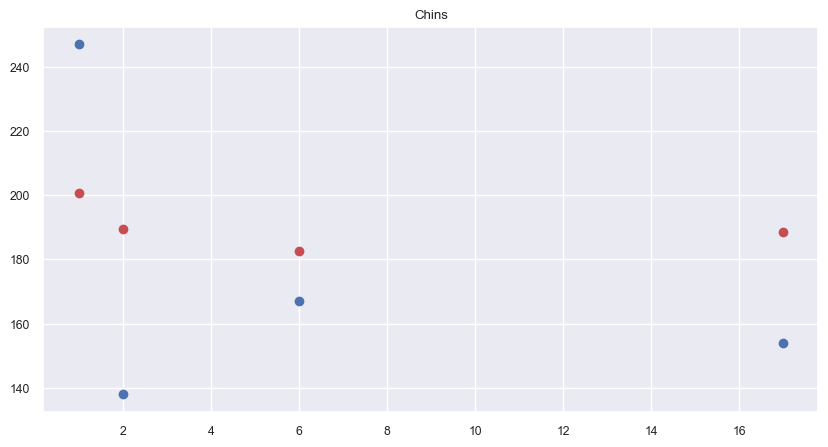

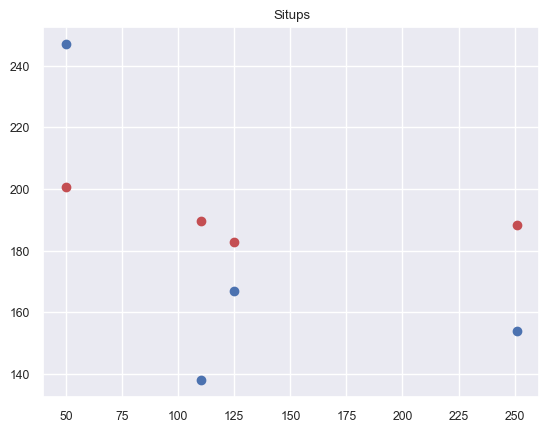

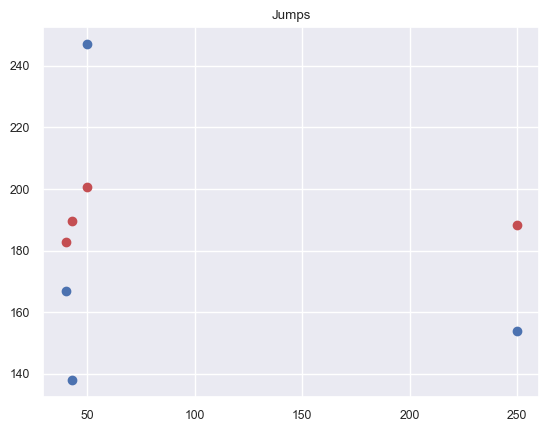

In [152]:
#예측값 저장
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
im_features = ['Chins', 'Situps', 'Jumps']
for i, feature in enumerate(lm_features):
    plt.title(feature)
    plt.scatter(X_test[feature], y_test, label='y_test')
    plt.scatter(X_test[feature], y_test_pred, c='r', label='y_pred')
    #plt.plot(X_train, lr.predict(X_train), color='blue')
    plt.show()          